In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
data = load_iris()

In [5]:
x=data.data

In [6]:
y=data.target

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
res = np.zeros((y.size,3),dtype=int)
res[np.arange(y.size),y]=1
res

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20,random_state=1)

In [10]:
ytrain.size

130

In [11]:
learning_rate=0.1
iterations=5000
N=ytrain.size
input_size=4
hidden_size=2
output_size=3
results=pd.DataFrame(columns=['mse'])

In [12]:
np.random.seed(10)
w1=np.random.normal(scale=0.5,size=(input_size,hidden_size))
w1

array([[ 0.66579325,  0.35763949],
       [-0.77270015, -0.00419192],
       [ 0.31066799, -0.36004278],
       [ 0.13275579,  0.05427426]])

In [13]:
w2=np.random.normal(scale=0.5,size=(hidden_size,output_size))
w2

array([[ 0.00214572, -0.08730011,  0.21651309],
       [ 0.60151869, -0.48253284,  0.51413704]])

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
def mean_squared_error(ypred,y_true):
    return((ypred-y_true)**2).sum()/(2*ypred.size)

In [16]:
for itr in range(iterations):
    #forward propagation
    z1=np.dot(x,w1)
    a1=sigmoid(z1)
    z2=np.dot(a1,w2)
    a2=sigmoid(z2)
    mse=mean_squared_error(a2,res)
    results=results.append({'mse':mse},ignore_index=True)
    #backword propagation
    e1=a2-res
    dw1=e1*a2*(1-a2)
    e2=np.dot(dw1,w2.T)
    dw2=e2*a1*(1-a1)
    w2_update=np.dot(a1.T,dw1)/N
    w1_update=np.dot(x.T,dw2)/N
    w2=w2-learning_rate*w2_update
    w1=w1-learning_rate*w1_update

In [17]:
results

,mse
0,0.137620
1,0.136538
2,0.135478
3,0.134446
4,0.133451
...,...
4995,0.050367
4996,0.050364
4997,0.050362
4998,0.050360


<AxesSubplot:>

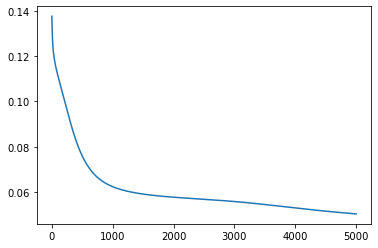

In [18]:
results.mse.plot()